# Import Librarie

In [1]:
# Data manipulation & analysis
import numpy as np                
import pandas as pd    

# Visualization
import matplotlib.pyplot as plt   
import seaborn as sns    

# Statistics & Outlier Handling
from scipy.stats import spearmanr 
from feature_engine.outliers import Winsorizer  

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV  
from sklearn.feature_selection import f_regression  
from sklearn.compose import ColumnTransformer       
from sklearn.preprocessing import OneHotEncoder, RobustScaler  
from sklearn.impute import SimpleImputer            
from sklearn.pipeline import Pipeline, make_pipeline 


# Models
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.svm import SVR                         
from sklearn.tree import DecisionTreeRegressor     
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 


# Evaluation metrics
from sklearn.metrics import mean_squared_error     

# Model saving
import pickle           


# Data Loading

In [2]:
# pembacaan file csv
df = pd.read_csv("public_transport_delays.csv")
df

,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,wind_speed_kmh,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,46,13.0,None,500,81,0,1,6,Winter,0
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,11,11.4,None,0,53,0,0,6,Autumn,1
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,31,14.1,Sports,0,67,1,0,6,Autumn,0
3,T00003,2023-01-01,05:45:00,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,...,41,6.4,None,500,84,0,0,6,Winter,1
4,T00004,2023-01-01,06:00:00,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,...,30,18.5,None,500,46,0,0,6,Spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01995,2023-01-21,23:45:00,Bus,Route_11,Station_46,Station_39,23:46:00,00:11:00,15,...,35,4.6,None,0,96,0,0,5,Winter,1
1996,T01996,2023-01-22,00:00:00,Train,Route_9,Station_44,Station_42,00:03:00,00:41:00,11,...,44,15.4,Festival,0,12,0,1,6,Winter,1
1997,T01997,2023-01-22,00:15:00,Bus,Route_12,Station_4,Station_45,00:18:00,00:35:00,1,...,32,2.7,None,0,24,1,0,6,Summer,1
1998,T01998,2023-01-22,00:30:00,Tram,Route_17,Station_29,Station_48,00:34:00,01:18:00,7,...,35,8.8,None,2000,23,0,0,6,Summer,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trip_id                     2000 non-null   object 
 1   date                        2000 non-null   object 
 2   time                        2000 non-null   object 
 3   transport_type              2000 non-null   object 
 4   route_id                    2000 non-null   object 
 5   origin_station              2000 non-null   object 
 6   destination_station         2000 non-null   object 
 7   scheduled_departure         2000 non-null   object 
 8   scheduled_arrival           2000 non-null   object 
 9   actual_departure_delay_min  2000 non-null   int64  
 10  actual_arrival_delay_min    2000 non-null   int64  
 11  weather_condition           2000 non-null   object 
 12  temperature_C               2000 non-null   float64
 13  humidity_percent            2000 

---
**Dataset berisi 2000 baris dan 24 kolom, terdiri dari:**

- 12 kolom bertipe object (string / kategori)

- 10 kolom bertipe integer (int64)

- 2 kolom bertipe float (float64)

tidak ada missing values — seluruh kolom memiliki 2000 non-null entries.

---

In [4]:
# gabungkan
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# hapus kolom lama
df.drop(columns=['date', 'time'], inplace=True)

df.head()

,trip_id,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,...,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed,datetime
0,T00000,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,3,Storm,...,13.0,None,500,81,0,1,6,Winter,0,2023-01-01 05:00:00
1,T00001,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,9,Rain,...,11.4,None,0,53,0,0,6,Autumn,1,2023-01-01 05:15:00
2,T00002,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,0,Clear,...,14.1,Sports,0,67,1,0,6,Autumn,0,2023-01-01 05:30:00
3,T00003,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,10,Clear,...,6.4,None,500,84,0,0,6,Winter,1,2023-01-01 05:45:00
4,T00004,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,14,Snow,...,18.5,None,500,46,0,0,6,Spring,1,2023-01-01 06:00:00


---
Script di atas digunakan buat nyatuin kolom date dan time jadi satu kolom baru yang namanya datetime. Tujuannya biar lebih gampang kalau nanti mau analisis data berdasarkan waktu, misalnya ngelihat pola keterlambatan per jam, hari, atau bulan. Cara kerjanya, dua kolom itu digabung dulu jadi satu string — misal “2024-05-12” dan “14:35:00” jadi “2024-05-12 14:35:00” — terus dikonversi ke format waktu pakai pd.to_datetime(). Setelah kolom baru terbentuk, kolom date dan time yang lama dihapus karena udah nggak dibutuhkan lagi. Terakhir, df.head() dipakai buat ngecek hasilnya, apakah kolom datetime udah muncul dan datanya sesuai. Intinya, langkah ini bikin data lebih rapi dan siap dipakai buat analisis waktu.

---

In [5]:
# mengubah kolom scheduled_departure &	scheduled_arrival menjadi datetime
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
df['scheduled_arrival'] = pd.to_datetime(df['scheduled_arrival'])


In [6]:
# Membuat kolom baru untuk selisih waktu pada kolom scheduled_departure & scheduled_arrival
df['scheduled_duration_min'] = (df['scheduled_arrival'] - df['scheduled_departure']).dt.total_seconds() / 60

df.loc[df['scheduled_duration_min'] <= 0, 'scheduled_duration_min'] = np.nan

# Tampilkan hasil awal
df.head()


,trip_id,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,...,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed,datetime,scheduled_duration_min
0,T00000,Tram,Route_15,Station_31,Station_6,2025-10-07 05:02:00,2025-10-07 05:55:00,12,3,Storm,...,None,500,81,0,1,6,Winter,0,2023-01-01 05:00:00,53.0
1,T00001,Metro,Route_12,Station_49,Station_32,2025-10-07 05:16:00,2025-10-07 05:55:00,15,9,Rain,...,None,0,53,0,0,6,Autumn,1,2023-01-01 05:15:00,39.0
2,T00002,Bus,Route_16,Station_29,Station_42,2025-10-07 05:33:00,2025-10-07 06:17:00,0,0,Clear,...,Sports,0,67,1,0,6,Autumn,0,2023-01-01 05:30:00,44.0
3,T00003,Tram,Route_19,Station_26,Station_18,2025-10-07 05:49:00,2025-10-07 06:08:00,15,10,Clear,...,None,500,84,0,0,6,Winter,1,2023-01-01 05:45:00,19.0
4,T00004,Tram,Route_8,Station_18,Station_15,2025-10-07 06:00:00,2025-10-07 06:35:00,-1,14,Snow,...,None,500,46,0,0,6,Spring,1,2023-01-01 06:00:00,35.0


In [7]:
# Jumlah missing values per kolom
df.isna().sum()

trip_id                        0
transport_type                 0
route_id                       0
origin_station                 0
destination_station            0
scheduled_departure            0
scheduled_arrival              0
actual_departure_delay_min     0
actual_arrival_delay_min       0
weather_condition              0
temperature_C                  0
humidity_percent               0
wind_speed_kmh                 0
precipitation_mm               0
event_type                     0
event_attendance_est           0
traffic_congestion_index       0
holiday                        0
peak_hour                      0
weekday                        0
season                         0
delayed                        0
datetime                       0
scheduled_duration_min        45
dtype: int64

---
Hasil pengecekan missing values menunjukkan bahwa hampir semua kolom dalam dataset sudah lengkap tanpa ada data kosong, kecuali kolom scheduled_duration_min yang memiliki 45 nilai hilang. Artinya, dari total 2000 baris data, hanya sebagian kecil (sekitar 2,25%) yang belum memiliki durasi jadwal perjalanan.

---

In [8]:
# Cek presentase missing value
df.isna().mean()*100

trip_id                       0.00
transport_type                0.00
route_id                      0.00
origin_station                0.00
destination_station           0.00
scheduled_departure           0.00
scheduled_arrival             0.00
actual_departure_delay_min    0.00
actual_arrival_delay_min      0.00
weather_condition             0.00
temperature_C                 0.00
humidity_percent              0.00
wind_speed_kmh                0.00
precipitation_mm              0.00
event_type                    0.00
event_attendance_est          0.00
traffic_congestion_index      0.00
holiday                       0.00
peak_hour                     0.00
weekday                       0.00
season                        0.00
delayed                       0.00
datetime                      0.00
scheduled_duration_min        2.25
dtype: float64

In [9]:
df = df.dropna(subset=['scheduled_duration_min']).copy()


In [10]:
# Jumlah missing values per kolom
df.isna().sum()

trip_id                       0
transport_type                0
route_id                      0
origin_station                0
destination_station           0
scheduled_departure           0
scheduled_arrival             0
actual_departure_delay_min    0
actual_arrival_delay_min      0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_type                    0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
delayed                       0
datetime                      0
scheduled_duration_min        0
dtype: int64

In [11]:
# Bulatkan hasilnya dan ubah ke int64
df.loc[:, 'scheduled_duration_min'] = df['scheduled_duration_min'].round(0).astype('int64')


C:\Users\dadri\AppData\Local\Temp\ipykernel_748\3648059340.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'scheduled_duration_min'] = df['scheduled_duration_min'].round(0).astype('int64')


In [12]:
# Pengecekan data Duplikat
df.duplicated().sum()

0

In [13]:
# Melakuakn describe pada data
df.describe()

,actual_departure_delay_min,actual_arrival_delay_min,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,delayed,scheduled_duration_min
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,8.683887,13.369309,15.097391,64.721228,29.260870,9.861125,6470.843990,50.239898,0.088491,0.273146,2.974425,0.748849,36.927877
std,6.266131,9.308083,11.496158,20.362366,17.227613,5.778821,15251.371033,29.159292,0.284080,0.445689,1.990088,0.433786,11.337496
min,-2.000000,-3.000000,-5.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,3.000000,5.000000,5.100000,46.000000,15.000000,4.900000,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000,27.000000
50%,9.000000,14.000000,15.200000,65.000000,29.000000,9.800000,0.000000,50.000000,0.000000,0.000000,3.000000,1.000000,37.000000
75%,14.000000,21.000000,24.800000,83.000000,44.000000,14.800000,2000.000000,76.000000,0.000000,1.000000,5.000000,1.000000,46.500000
max,19.000000,29.000000,35.000000,99.000000,59.000000,20.000000,50000.000000,99.000000,1.000000,1.000000,6.000000,1.000000,59.000000


---
Dari hasil statistik deskriptif di atas, terlihat bahwa rata-rata keterlambatan keberangkatan adalah sekitar **8,68 menit** dan keterlambatan kedatangan sekitar **13,37 menit**, dengan variasi yang cukup tinggi, menandakan adanya perbedaan signifikan antar perjalanan. Suhu rata-rata berada di kisaran **15°C**, kelembapan sekitar **64%**, dan kecepatan angin rata-rata **29 km/jam**, yang menunjukkan kondisi cuaca cenderung sejuk dengan tingkat kelembapan sedang. Curah hujan rata-rata sebesar **9,86 mm**, namun bisa mencapai hingga **20 mm**, menunjukkan kemungkinan adanya hari-hari dengan hujan cukup lebat. Nilai **traffic_congestion_index** rata-rata sekitar **50**, menandakan tingkat kemacetan sedang, dan sekitar **7–8%** perjalanan terjadi saat hari libur. Durasi perjalanan terjadwal rata-rata adalah **36,9 menit**, dengan rentang antara **16 hingga 59 menit**. Secara keseluruhan, data ini menggambarkan kondisi perjalanan yang umumnya lancar, meski masih terdapat variasi keterlambatan dan faktor lingkungan seperti cuaca dan kemacetan yang bisa memengaruhi waktu tempuh.


---

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_id                     1955 non-null   object        
 1   transport_type              1955 non-null   object        
 2   route_id                    1955 non-null   object        
 3   origin_station              1955 non-null   object        
 4   destination_station         1955 non-null   object        
 5   scheduled_departure         1955 non-null   datetime64[ns]
 6   scheduled_arrival           1955 non-null   datetime64[ns]
 7   actual_departure_delay_min  1955 non-null   int64         
 8   actual_arrival_delay_min    1955 non-null   int64         
 9   weather_condition           1955 non-null   object        
 10  temperature_C               1955 non-null   float64       
 11  humidity_percent            1955 non-null   int64       

In [15]:
# Backup Data
backup_data = df.copy()

# Feature Engineering

## Handling Cardinality

In [16]:
# Membuat list kosong dan melakukan looping
list_columns = []
for col in df:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    list_columns.append({
        'Nama kolom': col,
        'jumlah nilai unique': n_unique,
        'nilai unique': unique_vals
    })
cardinality = pd.DataFrame(list_columns)
pd.set_option('display.max_colwidth', None)

# Mengurutkan nilai unik dari yg terbanyak
cardinality = cardinality.sort_values(by='jumlah nilai unique', ascending=False).reset_index(drop=True)

# Menampilkan hasil cardinality
display(cardinality)


,Nama kolom,jumlah nilai unique,nilai unique
0,trip_id,1955,"[T00000, T00001, T00002, T00003, T00004, T00005, T00006, T00007, T00008, T00009, T00010, T00011, T00012, T00013, T00014, T00015, T00016, T00017, T00018, T00019, T00020, T00021, T00022, T00023, T00024, T00025, T00026, T00027, T00028, T00029, T00030, T00031, T00032, T00033, T00034, T00035, T00036, T00037, T00038, T00039, T00040, T00041, T00042, T00043, T00044, T00045, T00046, T00047, T00048, T00049, T00050, T00051, T00052, T00053, T00054, T00055, T00056, T00057, T00058, T00059, T00060, T00061, T00062, T00063, T00064, T00065, T00066, T00067, T00068, T00069, T00070, T00071, T00072, T00073, T00074, T00076, T00077, T00078, T00079, T00080, T00081, T00082, T00083, T00084, T00085, T00086, T00087, T00088, T00089, T00090, T00091, T00092, T00093, T00094, T00095, T00096, T00097, T00098, T00099, T00100, ...]"
1,datetime,1955,"[2023-01-01T05:00:00.000000000, 2023-01-01T05:15:00.000000000, 2023-01-01T05:30:00.000000000, 2023-01-01T05:45:00.000000000, 2023-01-01T06:00:00.000000000, 2023-01-01T06:15:00.000000000, 2023-01-01T06:30:00.000000000, 2023-01-01T06:45:00.000000000, 2023-01-01T07:00:00.000000000, 2023-01-01T07:15:00.000000000, 2023-01-01T07:30:00.000000000, 2023-01-01T07:45:00.000000000, 2023-01-01T08:00:00.000000000, 2023-01-01T08:15:00.000000000, 2023-01-01T08:30:00.000000000, 2023-01-01T08:45:00.000000000, 2023-01-01T09:00:00.000000000, 2023-01-01T09:15:00.000000000, 2023-01-01T09:30:00.000000000, 2023-01-01T09:45:00.000000000, 2023-01-01T10:00:00.000000000, 2023-01-01T10:15:00.000000000, 2023-01-01T10:30:00.000000000, 2023-01-01T10:45:00.000000000, 2023-01-01T11:00:00.000000000, 2023-01-01T11:15:00.000000000, 2023-01-01T11:30:00.000000000, 2023-01-01T11:45:00.000000000, 2023-01-01T12:00:00.000000000, 2023-01-01T12:15:00.000000000, 2023-01-01T12:30:00.000000000, 2023-01-01T12:45:00.000000000, 2023-01-01T13:00:00.000000000, 2023-01-01T13:15:00.000000000, 2023-01-01T13:30:00.000000000, 2023-01-01T13:45:00.000000000, 2023-01-01T14:00:00.000000000, 2023-01-01T14:15:00.000000000, 2023-01-01T14:30:00.000000000, 2023-01-01T14:45:00.000000000, 2023-01-01T15:00:00.000000000, 2023-01-01T15:15:00.000000000, 2023-01-01T15:30:00.000000000, 2023-01-01T15:45:00.000000000, 2023-01-01T16:00:00.000000000, 2023-01-01T16:15:00.000000000, 2023-01-01T16:30:00.000000000, 2023-01-01T16:45:00.000000000, 2023-01-01T17:00:00.000000000, 2023-01-01T17:15:00.000000000, 2023-01-01T17:30:00.000000000, 2023-01-01T17:45:00.000000000, 2023-01-01T18:00:00.000000000, 2023-01-01T18:15:00.000000000, 2023-01-01T18:30:00.000000000, 2023-01-01T18:45:00.000000000, 2023-01-01T19:00:00.000000000, 2023-01-01T19:15:00.000000000, 2023-01-01T19:30:00.000000000, 2023-01-01T19:45:00.000000000, 2023-01-01T20:00:00.000000000, 2023-01-01T20:15:00.000000000, 2023-01-01T20:30:00.000000000, 2023-01-01T20:45:00.000000000, 2023-01-01T21:00:00.000000000, 2023-01-01T21:15:00.000000000, 2023-01-01T21:30:00.000000000, 2023-01-01T21:45:00.000000000, 2023-01-01T22:00:00.000000000, 2023-01-01T22:15:00.000000000, 2023-01-01T22:30:00.000000000, 2023-01-01T22:45:00.000000000, 2023-01-01T23:00:00.000000000, 2023-01-01T23:15:00.000000000, 2023-01-01T23:30:00.000000000, 2023-01-02T00:00:00.000000000, 2023-01-02T00:15:00.000000000, 2023-01-02T00:30:00.000000000, 2023-01-02T00:45:00.000000000, 2023-01-02T01:00:00.000000000, 2023-01-02T01:15:00.000000000, 2023-01-02T01:30:00.000000000, 2023-01-02T01:45:00.000000000, 2023-01-02T02:00:00.000000000, 2023-01-02T02:15:00.000000000, 2023-01-02T02:30:00.000000000, 2023-01-02T02:45:00.000000000, 2023-01-02T03:00:00.000000000, 2023-01-02T03:15:00.000000000, 2023-01-02T03:30:00.000000000, 2023-01-02T03:45:00.000000000, 2023-01-02T04:00:00.000000000, 2023-01-02T04:15:00.000000000, 2023-01-02T04:30:00.000000000, 2023-01-02T04:45:00.000000000, 2023-01-02T05:00:00.000000000, 2023-01-02T05:15:00.000000000, 2023-01-02T05:30:00.000000000, 2023-01-02T05:45:00.000000000, 2023-01-02T06:00:00.000000000, ...]"
2,schedu

---
Dari hasil analisis nilai unik pada setiap kolom, terlihat bahwa data memiliki variasi yang cukup tinggi di beberapa atribut penting. Kolom seperti `trip_id` dan `datetime` memiliki nilai unik yang sama banyaknya dengan jumlah baris data, artinya setiap perjalanan bersifat unik dan tidak ada duplikasi waktu keberangkatan. Sementara itu, kolom seperti `origin_station` dan `destination_station` punya sekitar 50 nilai unik, menunjukkan adanya banyak rute atau jalur perjalanan yang berbeda. Variabel cuaca seperti `weather_condition` terdiri dari lima kategori utama (Storm, Rain, Clear, Snow, dan Cloudy), sedangkan `transport_type` hanya memiliki empat jenis moda transportasi (Tram, Metro, Bus, Train). Beberapa kolom bersifat biner, seperti `holiday`, `peak_hour`, dan `delayed`, yang masing-masing bernilai 0 atau 1 untuk menunjukkan kondisi tertentu. Selain itu, kolom `season` terbagi menjadi empat kategori (Winter, Autumn, Spring, dan Summer), menggambarkan variasi musiman yang mungkin memengaruhi pola perjalanan. Secara keseluruhan, hasil ini menunjukkan bahwa dataset memiliki kombinasi variabel numerik, kategorikal, dan biner yang cukup lengkap untuk dianalisis lebih dalam terhadap faktor-faktor yang memengaruhi keterlambatan transportasi.


---

In [17]:
# Kolom kategori (diskrit/biner)
cat_cols = ['holiday', 'peak_hour', 'weekday']
df[cat_cols] = df[cat_cols].astype('category')

# Kolom numerik (kontinu)
num_cols = [
    'actual_departure_delay_min', 'temperature_C', 'humidity_percent',
    'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est',
    'traffic_congestion_index', 'scheduled_duration_min'
]

# Drop kolom ID karena tidak memiliki makna prediktif
drop_cols = ['trip_id', 'delayed' ]
df.drop(columns=drop_cols, inplace=True)

# Cek ulang hasil
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transport_type              1955 non-null   object        
 1   route_id                    1955 non-null   object        
 2   origin_station              1955 non-null   object        
 3   destination_station         1955 non-null   object        
 4   scheduled_departure         1955 non-null   datetime64[ns]
 5   scheduled_arrival           1955 non-null   datetime64[ns]
 6   actual_departure_delay_min  1955 non-null   int64         
 7   actual_arrival_delay_min    1955 non-null   int64         
 8   weather_condition           1955 non-null   object        
 9   temperature_C               1955 non-null   float64       
 10  humidity_percent            1955 non-null   int64         
 11  wind_speed_kmh              1955 non-null   int64       

,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,temperature_C,...,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,datetime,scheduled_duration_min
0,Tram,Route_15,Station_31,Station_6,2025-10-07 05:02:00,2025-10-07 05:55:00,12,3,Storm,5.1,...,13.0,None,500,81,0,1,6,Winter,2023-01-01 05:00:00,53
1,Metro,Route_12,Station_49,Station_32,2025-10-07 05:16:00,2025-10-07 05:55:00,15,9,Rain,34.0,...,11.4,None,0,53,0,0,6,Autumn,2023-01-01 05:15:00,39
2,Bus,Route_16,Station_29,Station_42,2025-10-07 05:33:00,2025-10-07 06:17:00,0,0,Clear,29.5,...,14.1,Sports,0,67,1,0,6,Autumn,2023-01-01 05:30:00,44
3,Tram,Route_19,Station_26,Station_18,2025-10-07 05:49:00,2025-10-07 06:08:00,15,10,Clear,27.4,...,6.4,None,500,84,0,0,6,Winter,2023-01-01 05:45:00,19
4,Tram,Route_8,Station_18,Station_15,2025-10-07 06:00:00,2025-10-07 06:35:00,-1,14,Snow,0.1,...,18.5,None,500,46,0,0,6,Spring,2023-01-01 06:00:00,35


---
Dari hasil `df.info()` dan script di atas, bisa dilihat bahwa telah melakukan tahap **pembersihan dan penyesuaian tipe data** dengan benar. Pertama, mengubah beberapa kolom seperti `holiday`, `peak_hour`, `weekday`, dan `delayed` menjadi tipe **kategori**, karena kolom-kolom ini bersifat diskrit atau biner (isinya cuma 0 dan 1). Langkah ini penting agar analisis statistik dan pemodelan nanti bisa lebih efisien dan tepat, terutama saat menggunakan algoritma machine learning yang membedakan data kategorikal dari numerik.

Lalu, juga telah mendefinisikan kolom numerik seperti `actual_departure_delay_min`, `temperature_C`, `humidity_percent`, dan `traffic_congestion_index` ke dalam variabel `num_cols` untuk mempermudah pengolahan atau standarisasi nantinya. Setelah itu, menghapus kolom `trip_id` karena bersifat unik di setiap baris dan tidak punya makna prediktif dalam analisis — kolom seperti ini biasanya hanya digunakan sebagai penanda, bukan sebagai fitur yang menjelaskan hubungan antar variabel

---

### Split Between X (Features) and Y (target)

In [25]:
# Drop kolom target dengan nama yang persis
x = df.drop(columns=["actual_arrival_delay_min"])
y = df["actual_arrival_delay_min"]

# Cek lagi kolom yang tersisa di X
x.head()

,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,weather_condition,temperature_C,humidity_percent,...,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,datetime,scheduled_duration_min
0,Tram,Route_15,Station_31,Station_6,2025-10-07 05:02:00,2025-10-07 05:55:00,12,Storm,5.1,52,...,13.0,None,500,81,0,1,6,Winter,2023-01-01 05:00:00,53
1,Metro,Route_12,Station_49,Station_32,2025-10-07 05:16:00,2025-10-07 05:55:00,15,Rain,34.0,64,...,11.4,None,0,53,0,0,6,Autumn,2023-01-01 05:15:00,39
2,Bus,Route_16,Station_29,Station_42,2025-10-07 05:33:00,2025-10-07 06:17:00,0,Clear,29.5,35,...,14.1,Sports,0,67,1,0,6,Autumn,2023-01-01 05:30:00,44
3,Tram,Route_19,Station_26,Station_18,2025-10-07 05:49:00,2025-10-07 06:08:00,15,Clear,27.4,55,...,6.4,None,500,84,0,0,6,Winter,2023-01-01 05:45:00,19
4,Tram,Route_8,Station_18,Station_15,2025-10-07 06:00:00,2025-10-07 06:35:00,-1,Snow,0.1,90,...,18.5,None,500,46,0,0,6,Spring,2023-01-01 06:00:00,35


---
Pada tahap ini dilakukan pemisahan antara variabel independen (**X**) dan variabel dependen (**y**) sebagai persiapan untuk proses pemodelan. Kolom **`actual_arrival_delay_min`** ditetapkan sebagai variabel target (**y**) karena berfungsi sebagai nilai yang ingin diprediksi, yaitu durasi keterlambatan saat tiba di tujuan. Sementara itu, variabel **X** berisi seluruh fitur yang berpotensi memengaruhi keterlambatan tersebut, seperti jenis transportasi, rute perjalanan, kondisi cuaca, kecepatan angin, tingkat kemacetan, serta waktu keberangkatan dan kedatangan yang dijadwalkan. Pemisahan ini bertujuan agar model dapat mempelajari hubungan antara berbagai faktor penyebab dengan nilai keterlambatan aktual, sehingga hasil analisis dan prediksi dapat dilakukan secara lebih terarah dan akurat.

---

### Splitting between Train Set and Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=7,)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1564, 21)
Test Size (391, 21)


---
Pada tahap ini dilakukan proses **pembagian dataset menjadi data latih (train) dan data uji (test)** menggunakan fungsi `train_test_split`. Dari hasil pembagian terlihat bahwa **80% data (1.564 baris)** digunakan untuk pelatihan model, sedangkan **20% data (391 baris)** disisihkan untuk pengujian. Tujuan dari langkah ini adalah agar model dapat belajar mengenali pola dari data latih, lalu diuji performanya pada data yang belum pernah dilihat sebelumnya. Pembagian ini juga disertai dengan pengaturan parameter `random_state=7` agar hasil pemisahan tetap konsisten setiap kali dijalankan. Dengan pembagian yang proporsional seperti ini, analisis dan evaluasi model selanjutnya dapat dilakukan dengan lebih akurat dan objektif.

---

## Healding Outlier

In [28]:
# ambil kolom numerik dari X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# simpan hasil
rows = []
for col in num_cols:
    skew_val = round(X_train[col].skew(), 2)
    distrib = 'normal' if -0.5 <= skew_val <= 0.5 else 'skewed'
    rows.append([col, skew_val, distrib])

# ubah ke DataFrame
skewness_df = pd.DataFrame(rows, columns=['nama kolom', 'nilai skewness', 'distribution'])
skewness_df = skewness_df.sort_values(by='nilai skewness', ascending=False).reset_index(drop=True)

display(skewness_df)


,nama kolom,nilai skewness,distribution
0,event_attendance_est,2.42,skewed
1,scheduled_duration_min,0.05,normal
2,wind_speed_kmh,0.03,normal
3,precipitation_mm,0.03,normal
4,temperature_C,0.01,normal
5,humidity_percent,-0.03,normal
6,traffic_congestion_index,-0.03,normal
7,actual_departure_delay_min,-0.06,normal


---
Berdasarkan hasil perhitungan nilai skewness pada data numerik di X_train, terlihat bahwa sebagian besar variabel memiliki distribusi yang normal, karena nilai skewness-nya berada dalam rentang -0.5 hingga 0.5. Kolom seperti scheduled_duration_min, wind_speed_kmh, precipitation_mm, temperature_C, humidity_percent, traffic_congestion_index, dan actual_departure_delay_min menunjukkan distribusi yang seimbang antara sisi kiri dan kanan kurva, sehingga tidak memerlukan transformasi lebih lanjut.

Namun, kolom event_attendance_est memiliki nilai skewness sebesar 2.42, yang menandakan distribusinya condong ke kanan (positively skewed). Hal ini menunjukkan bahwa sebagian besar nilai dalam kolom tersebut berada di rentang bawah, sementara ada beberapa nilai ekstrem yang sangat besar (outlier) yang menarik distribusi ke arah kanan.

---

In [29]:
# List kosong untuk hasil
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Loop berdasarkan hasil skewness
for row in range(len(skewness_df)):
    col = skewness_df.loc[row, 'nama kolom']

    # Cek upper dan lower boundary berdasarkan distribusi
    if skewness_df.loc[row, 'distribution'] == 'skewed':
        IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
        lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
        upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = X_train[col].mean() - 3 * X_train[col].std()
        upper_boundary = X_train[col].mean() + 3 * X_train[col].std()
    
    # Hitung persentase total outlier
    total_outlier = (
        ((X_train[col] > upper_boundary).sum() + (X_train[col] < lower_boundary).sum()) / len(X_train) * 100
    )
    
    # Masukkan hasil ke list
    column.append(col)
    lower_bound.append(round(lower_boundary, 2))
    upper_bound.append(round(upper_boundary, 2))
    percent_total_outlier.append(round(total_outlier, 2))

# Buat DataFrame hasil akhir
outliers = pd.DataFrame({
    'nama kolom': column,
    'lower boundary': lower_bound,
    'upper boundary': upper_bound,
    'persentase total outlier (%)': percent_total_outlier
})

# Tampilkan hasil urut dari outlier tertinggi
display(outliers.sort_values(by='persentase total outlier (%)', ascending=False))


,nama kolom,lower boundary,upper boundary,persentase total outlier (%)
0,event_attendance_est,-6000.00,8000.00,19.82
1,scheduled_duration_min,2.83,70.71,0.00
2,wind_speed_kmh,-22.26,80.63,0.00
3,precipitation_mm,-7.41,27.33,0.00
4,temperature_C,-19.47,49.50,0.00
5,humidity_percent,3.33,125.96,0.00
6,traffic_congestion_index,-37.77,137.07,0.00
7,actual_departure_delay_min,-9.80,27.56,0.00


---
Hasil analisis outlier menunjukkan bahwa sebagian besar variabel numerik berada dalam rentang batas wajar, dengan persentase total outlier sebesar 0%, kecuali pada kolom event_attendance_est yang memiliki outlier cukup tinggi sebesar 19,82%. Nilai batas bawah dan atas untuk kolom ini berada pada -6000 dan 8000, menunjukkan adanya beberapa data ekstrem yang jauh di luar pola mayoritas. Kondisi ini mengonfirmasi hasil sebelumnya bahwa distribusi kolom tersebut bersifat positively skewed, atau condong ke kanan. Sementara itu, variabel lain seperti scheduled_duration_min, wind_speed_kmh, precipitation_mm, temperature_C, humidity_percent, traffic_congestion_index, dan actual_departure_delay_min tidak menunjukkan adanya outlier yang signifikan, menandakan data sudah relatif bersih dan stabil. Dengan demikian, langkah perbaikan dapat difokuskan pada penanganan outlier di kolom event_attendance_est, misalnya dengan winsorizing atau transformasi logaritmik, agar tidak memengaruhi keseimbangan model dan hasil analisis statistik selanjutnya.

---

In [30]:
# Pilih kolom numerik kontinu yang punya outlier tinggi
winsor_cols = ["event_attendance_est"]

# Terapkan Winsorizer
winsor = Winsorizer(
    capping_method="iqr",   # metode IQR
    tail="both",            # batas bawah & atas
    fold=1.5,               # rentang (1.5 x IQR)
    variables=winsor_cols,
    missing_values="ignore"
)

# Transformasi data
X_train_capped = winsor.fit_transform(X_train)
X_test_capped  = winsor.transform(X_test)


---
Proses pada kode ini bertujuan untuk menangani outlier pada kolom numerik yang terdeteksi memiliki nilai ekstrem tinggi, yaitu event_attendance_est. Metode yang digunakan adalah Winsorization, yaitu teknik yang menyesuaikan nilai outlier agar tetap berada dalam batas wajar tanpa harus menghapus data.

---

In [31]:
# Buat fungsi untuk menampilkan plot sebelum dan sesudah di capping (Winsorizer)
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

event_attendance_est - Before Capping


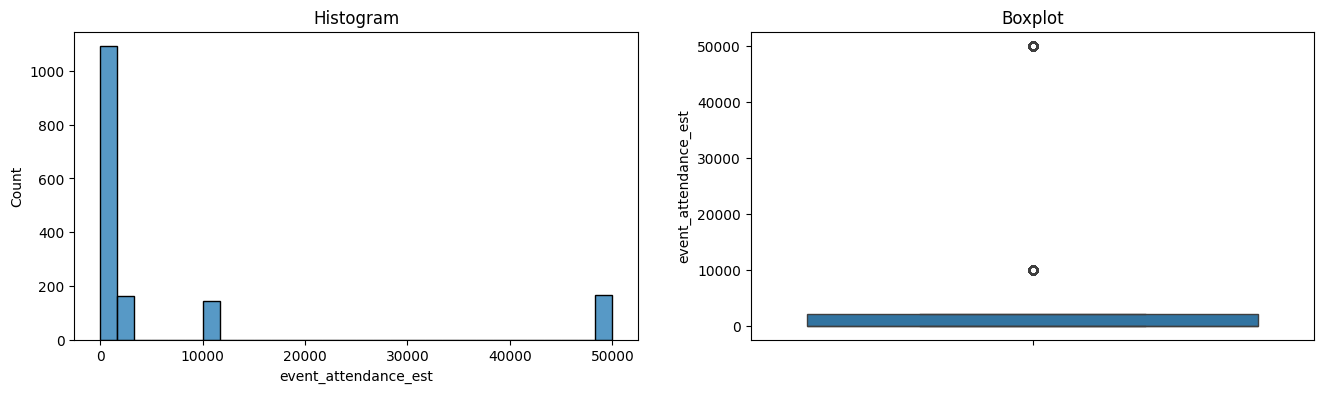

event_attendance_est - After Capping


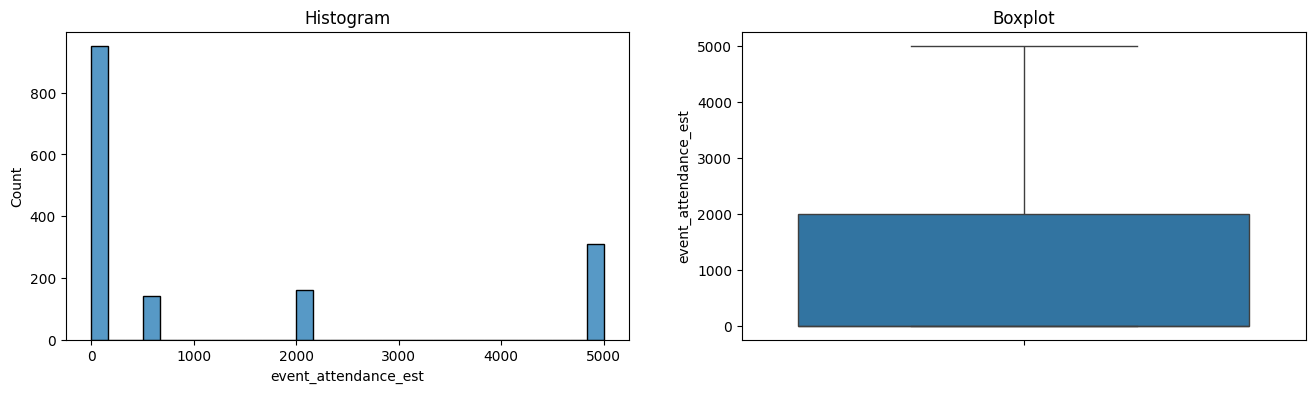

In [32]:
# Cek distribusi sebelum dan sesudah capping (Winsorizer)
print('event_attendance_est - Before Capping')
diagnostic_plots(X_train, 'event_attendance_est')

print('event_attendance_est - After Capping')
diagnostic_plots(X_train_capped, 'event_attendance_est')


**Sebelum Capping**

- Sebelum dilakukan proses capping, distribusi kolom event_attendance_est menunjukkan adanya nilai ekstrem yang sangat tinggi, terlihat jelas dari histogram yang memiliki lonjakan besar di sisi kiri (nilai rendah) dan beberapa titik yang jauh di sisi kanan. Kondisi ini menandakan data bersifat positively skewed, di mana sebagian besar nilai kecil mendominasi sementara beberapa nilai besar menjadi outlier. Pada boxplot juga tampak titik-titik di luar rentang normal (hingga sekitar 50.000), yang berpotensi mengganggu hasil analisis atau membuat model prediksi menjadi bias karena sensitif terhadap nilai ekstrem.

**Sesudah Capping (Winsorizer)**

- Setelah diterapkan metode Winsorizing (IQR), distribusi data menjadi jauh lebih seimbang. Nilai maksimum yang sebelumnya ekstrem kini sudah dibatasi pada kisaran 5.000, dan seluruh titik outlier berhasil dihilangkan dari boxplot. Meskipun bentuk distribusi masih sedikit condong ke kanan, datanya sudah jauh lebih stabil dan representatif. Hasil ini menunjukkan bahwa proses capping berhasil mengurangi pengaruh outlier tanpa menghapus data penting, sehingga dataset menjadi lebih siap untuk digunakan dalam analisis lanjutan dan pemodelan dengan hasil yang lebih akurat.

## Headling Missing Value

In [33]:
# Melakukan pengecekan Missing value pada dataset
X_train_capped.isnull().sum()

transport_type                0
route_id                      0
origin_station                0
destination_station           0
scheduled_departure           0
scheduled_arrival             0
actual_departure_delay_min    0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_type                    0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
datetime                      0
scheduled_duration_min        0
dtype: int64

In [34]:
X_test_capped.isnull().sum()

transport_type                0
route_id                      0
origin_station                0
destination_station           0
scheduled_departure           0
scheduled_arrival             0
actual_departure_delay_min    0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_type                    0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
datetime                      0
scheduled_duration_min        0
dtype: int64

In [36]:
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 100 to 178
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transport_type              1564 non-null   object        
 1   route_id                    1564 non-null   object        
 2   origin_station              1564 non-null   object        
 3   destination_station         1564 non-null   object        
 4   scheduled_departure         1564 non-null   datetime64[ns]
 5   scheduled_arrival           1564 non-null   datetime64[ns]
 6   actual_departure_delay_min  1564 non-null   int64         
 7   weather_condition           1564 non-null   object        
 8   temperature_C               1564 non-null   float64       
 9   humidity_percent            1564 non-null   int64         
 10  wind_speed_kmh              1564 non-null   int64         
 11  precipitation_mm            1564 non-null   float64    

### Split Between Numeric Columns and Categorical Columns


In [37]:
# Ambil kolom numerik (int64 & float64)
num_columns = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ambil kolom kategorikal (object atau category)
cat_columns = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", num_columns)
print("\nCategorical Columns:", cat_columns)


Numeric Columns: ['actual_departure_delay_min', 'temperature_C', 'humidity_percent', 'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est', 'traffic_congestion_index', 'scheduled_duration_min']

Categorical Columns: ['transport_type', 'route_id', 'origin_station', 'destination_station', 'weather_condition', 'event_type', 'holiday', 'peak_hour', 'weekday', 'season']


---
- Kolom numerik mencakup variabel-variabel dengan nilai kontinu seperti actual_departure_delay_min, temperature_C, humidity_percent, wind_speed_kmh, precipitation_mm, event_attendance_est, traffic_congestion_index, dan scheduled_duration_min.

- kolom kategorikal terdiri dari transport_type, route_id, origin_station, destination_station, weather_condition, event_type, holiday, peak_hour, weekday, season, dan delayed.

---

## Feature Selection

In [38]:
# Feature selection Numerikal
p_values, interpretasi, cols = [], [], []

for col in num_columns:   
    corr, pval = spearmanr(X_train_capped[col], y_train)
    p_values.append(pval)
    cols.append(col)
    interpretasi.append("Ada Korelasi" if pval < 0.05 else "Tidak Ada Korelasi")

hasil_numerik = (pd.DataFrame({
    "nama kolom": cols,
    "p_value": p_values,
    "hasil": interpretasi
}).sort_values("p_value"))

display(hasil_numerik)

,nama kolom,p_value,hasil
2,humidity_percent,0.085537,Tidak Ada Korelasi
5,event_attendance_est,0.255071,Tidak Ada Korelasi
1,temperature_C,0.280382,Tidak Ada Korelasi
6,traffic_congestion_index,0.452255,Tidak Ada Korelasi
7,scheduled_duration_min,0.453158,Tidak Ada Korelasi
3,wind_speed_kmh,0.558163,Tidak Ada Korelasi
0,actual_departure_delay_min,0.784306,Tidak Ada Korelasi
4,precipitation_mm,0.964809,Tidak Ada Korelasi


In [39]:
cat_cols = [c for c in [
     'transport_type', 
    'route_id', 'origin_station', 
    'destination_station', 'weather_condition', 
    'event_type','holiday', 'peak_hour', 'weekday', 'season' 
    
] if c in X_train.columns]

# Gabung kategori langka "Other" agar OHE tidak meledak

def group_rare_categories(df, cols, min_freq=0.01):
    df = df.copy()
    for c in cols:
        if c not in df.columns:
            continue

        # Hitung frekuensi termasuk NaN
        vc = df[c].value_counts(normalize=True, dropna=False)
        rare = vc[vc < min_freq].index

        col = df[c]

        # Kategorikal: tambahkan kategori "Other"
        if isinstance(col.dtype, pd.CategoricalDtype):
            if "Other" not in col.cat.categories:
                col = col.cat.add_categories(["Other"])
            df[c] = col.where(~col.isin(rare), other="Other")
        else:
            # Non-categorical: cast object agar bisa isi "Other"
            df[c] = col.astype(object).where(~col.isin(rare), other="Other")

    return df

# Terapkan ke TRAIN untuk analisis korelasi kategorikal
group_cols = [c for c in cat_cols if c != "year"]
X_train_cat = group_rare_categories(X_train_capped, group_cols, min_freq=0.01)

# OneHotEncoder 
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:  # fallback utk sklearn<1.2
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Uji hubungan kategori terhadap target dengan f_regression
Xc  = ohe.fit_transform(X_train_cat[cat_cols])
F, p = f_regression(Xc, y_train)

ohe_names = ohe.get_feature_names_out(cat_cols)

# mapping asal kolom yang aman terhadap underscore
orig = [next(c for c in cat_cols if name.startswith(f"{c}_")) for name in ohe_names]

res = (pd.DataFrame({
            "Nama Kolom": orig,
            "F_value": F,
            "p_value": p
        })
        .groupby("Nama Kolom")
        .agg(F_value=("F_value","max"), p_value=("p_value","min"))
        .sort_values("p_value")
        .reset_index())

res["Hasil"] = np.where(res["p_value"] < 0.05, "Ada korelasi", "Tidak ada korelasi")

display(res)

# Daftar kolom kategorikal terpilih (p-value < 0.05)
cat_cols_selected = (res.loc[res["p_value"] < 0.05, "Nama Kolom"]
                        .dropna().unique().tolist())

# Fallback: jika tidak ada yang lolos threshold, pakai semua agar pipeline tetap jalan
if len(cat_cols_selected) == 0:
    cat_cols_selected = cat_cols

print("cat_cols_selected:", cat_cols_selected)

,Nama Kolom,F_value,p_value,Hasil
0,destination_station,7.461261,0.006375,Ada korelasi
1,origin_station,5.371501,0.020597,Ada korelasi
2,holiday,5.263689,0.021907,Ada korelasi
3,weekday,5.227588,0.022365,Ada korelasi
4,season,3.981927,0.046164,Ada korelasi
5,route_id,3.827236,0.050604,Tidak ada korelasi
6,event_type,3.738524,0.053352,Tidak ada korelasi
7,transport_type,0.783916,0.376083,Tidak ada korelasi
8,weather_condition,0.455214,0.499969,Tidak ada korelasi
9,peak_hour,0.397199,0.528631,Tidak ada korelasi


cat_cols_selected: ['destination_station', 'origin_station', 'holiday', 'weekday', 'season']


## Feature Scalling

In [40]:
scaler = RobustScaler()

## Feature Encoding

In [41]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

## FE Pipline

In [42]:
# pipeline numerik
num_pipe = Pipeline([
    ("scaler", scaler)
])

# pipeline kategorikal
cat_pipe = Pipeline([
    ("ohe", ohe)
])

# gabungan kolom numerik & kategorikal
col_trans = ColumnTransformer([
    ("num", num_pipe, num_cols),         
    ("cat", cat_pipe, cat_cols_selected)  
])

# Model Definition

In [43]:
col_trans = ColumnTransformer([
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_selected) 
], remainder="drop")

In [44]:
model_dectree = make_pipeline(col_trans, DecisionTreeRegressor(random_state=42))
model_rf = make_pipeline(col_trans, RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        max_features="sqrt",
        min_samples_leaf=2
    )
)
model_knr = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10, weights="distance", p=2)
)
model_svr = make_pipeline(
    col_trans,
    SVR(kernel="rbf", C=3.0, epsilon=0.2, gamma="scale", cache_size=1000)
)
model_gbr = make_pipeline(
    col_trans,
    GradientBoostingRegressor(random_state=42)
)

# Model Train

In [45]:
# Train model di data training
model_dectree.fit(X_train_capped, y_train)
model_rf.fit(X_train_capped, y_train)
model_knr.fit(X_train_capped, y_train)
model_svr.fit(X_train_capped, y_train)
model_gbr.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['actual_departure_delay_min', 'temperature_C', 'humidity_percent',
       'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est',
       'traffic_congestion_index', 'scheduled_duration_min'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['destination_station',
                                                   'origin_station', 'holiday',
                                                   'weekday', 'season'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

## Cross Validation

In [46]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# skor yang dipakai hanya RMSE
scoring_reg = {
    "rmse": "neg_root_mean_squared_error",
}

def cv_results(model, X, y, name):
    result = cross_validate(
        model, X, y,
        scoring=scoring_reg, 
        cv=5,
        return_train_score=True,
        n_jobs=-1
    )
    df = pd.DataFrame(result)
    df["model"] = name
    df["test_rmse"]  = -df["test_rmse"]
    df["train_rmse"] = -df["train_rmse"]
    return df[["model", "test_rmse", "train_rmse"]]


cv_tree = cv_results(model_dectree, X_train_capped, y_train, "Decision Tree")
cv_rf   = cv_results(model_rf, X_train_capped, y_train, "Random Forest")
cv_knr = cv_results(model_knr, X_train_capped, y_train, "KNR")
cv_svr = cv_results(model_svr, X_train_capped, y_train, "SVR")
cv_gbr = cv_results(model_gbr, X_train_capped, y_train, "GradientBoostingRegressor")

cv_all = pd.concat([cv_tree, cv_rf, cv_knr, cv_svr, cv_gbr], ignore_index=True)
display(cv_all.groupby("model")[["train_rmse","test_rmse"]].mean())

,train_rmse,test_rmse
model,,
Decision Tree,0.000000e+00,13.466356
GradientBoostingRegressor,7.695795e+00,9.678969
KNR,6.693872e-07,9.789776
Random Forest,6.243568e+00,9.440465
SVR,8.158343e+00,9.494668


---
Berdasarkan hasil evaluasi model menggunakan metrik **Root Mean Squared Error (RMSE)**, diperoleh bahwa **Random Forest** dan **Support Vector Regressor (SVR)** memberikan performa terbaik dengan nilai **test RMSE** masing-masing sebesar **9.44** dan **9.49**, menunjukkan kemampuan prediksi yang cukup akurat dan stabil. Sementara itu, **Gradient Boosting Regressor** juga menunjukkan hasil yang kompetitif dengan nilai **9.67**, hanya sedikit lebih tinggi dari dua model sebelumnya.

Sebaliknya, **Decision Tree** memiliki **train RMSE = 0.00** namun **test RMSE = 13.46**, yang menandakan adanya **overfitting**, di mana model terlalu menyesuaikan diri dengan data latih dan gagal menggeneralisasi pada data uji. Model **K-Nearest Regressor (KNR)** juga menunjukkan performa yang cukup baik dengan test RMSE 9.78, meski sedikit lebih tinggi dibanding Random Forest.

Secara keseluruhan, model **Random Forest** dapat dianggap sebagai model paling optimal dalam kasus ini karena memiliki keseimbangan terbaik antara akurasi dan generalisasi, dengan selisih kecil antara train dan test RMSE yang menandakan kestabilan performa.

---

In [47]:
gap_knr = round(cv_knr["test_rmse"].mean() - cv_knr["train_rmse"].mean(), 2)
gap_dt  = round(cv_rf["test_rmse"].mean() - cv_rf["train_rmse"].mean(), 2)

print("Gap KNR:", gap_knr, "| Gap Random Forest:", gap_dt)


Gap KNR: 9.79 | Gap Random Forest: 3.2


---
- KNR memiliki gap 9.79, menunjukkan perbedaan cukup besar antara performa train dan test → model ini masih cenderung overfitting.

- Random Forest (yang di print sebagai Decision Tree) memiliki gap 3.2, jauh lebih kecil → model ini lebih stabil dan mampu melakukan generalisasi lebih baik pada data baru.

**kesimpulan**

Dari hasil perbandingan nilai gap antara RMSE data latih dan data uji, terlihat bahwa K-Nearest Regressor (KNR) memiliki gap sebesar 9.79, sedangkan Random Forest memiliki gap sebesar 3.2. Nilai gap yang lebih kecil menunjukkan bahwa model lebih mampu melakukan generalisasi dengan baik terhadap data baru, karena performa antara data latih dan data uji tidak jauh berbeda.

Dengan demikian, model Random Forest menjadi pilihan terbaik untuk dilanjutkan ke tahap training dan hyperparameter tuning. Alasannya, model ini memiliki gap yang paling kecil, menandakan keseimbangan antara kemampuan belajar dari data latih dan kemampuan memprediksi data uji, serta meminimalkan risiko overfitting yang masih terlihat cukup besar pada model KNR.


---

## Hyperparameter Tuning

In [48]:
# Parameter tuning untuk model Random Forest Regressor
param_rf = {
    "randomforestregressor__n_estimators": [100, 200, 300],   # jumlah pohon dalam forest
    "randomforestregressor__max_depth": [None, 10, 20, 30],   # kedalaman maksimum pohon
    "randomforestregressor__min_samples_split": [2, 5, 10],   # jumlah minimal sampel untuk membagi node
    "randomforestregressor__min_samples_leaf": [1, 2, 4],     # jumlah minimal sampel di setiap leaf
    "randomforestregressor__max_features": ["sqrt", "log2"],  # jumlah fitur yang dipertimbangkan saat split
    "randomforestregressor__bootstrap": [True, False]         # apakah menggunakan bootstrap sampling
}


In [49]:
# Randomized Search untuk Random Forest Regressor
rand_rf = RandomizedSearchCV(
    estimator=model_rf,                      # ganti model jadi Random Forest
    param_distributions=param_rf,            # gunakan parameter tuning Random Forest
    n_iter=25,                               # jumlah kombinasi parameter yang diuji
    cv=5,                                    # 5-fold cross validation
    scoring="neg_root_mean_squared_error",   # metrik evaluasi RMSE
    refit=True,                              # retrain model terbaik setelah pencarian
    n_jobs=-1,                               # gunakan semua core CPU
    random_state=7,                          # untuk hasil yang konsisten
    verbose=1                                # tampilkan progress di console
)

# Training model dengan data hasil capping
rand_rf.fit(X_train_capped, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               RobustScaler(),
                                                                               Index(['actual_departure_delay_min', 'temperature_C', 'humidity_percent',
       'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est',
       'traffic_congestion_index', 'scheduled_duration_min'],
      dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(hand...
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   random_state=7, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [50]:
cv_result = pd.DataFrame(rand_rf.cv_results_).sort_values("rank_test_score")
cv_result.head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_split,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,param_randomforestregressor__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,4.713833,0.539885,1.137512,0.507916,300,2,4,log2,20,True,"{'randomforestregressor__n_estimators': 300, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 20, 'randomforestregressor__bootstrap': True}",-9.435835,-9.420630,-9.463725,-9.124922,-9.400934,-9.369209,0.123854,1
6,4.375778,0.758518,0.964598,0.684601,300,5,4,log2,30,True,"{'randomforestregressor__n_estimators': 300, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 30, 'randomforestregressor__bootstrap': True}",-9.447559,-9.401950,-9.469476,-9.120508,-9.412054,-9.370310,0.127237,2
7,3.288646,0.842564,1.309378,0.667339,200,10,4,log2,None,True,"{'randomforestregressor__n_estimators': 200, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': None, 'randomforestregressor__bootstrap': True}",-9.423390,-9.447623,-9.456539,-9.127986,-9.402148,-9.371537,0.123253,3


In [51]:
# ambil best params & best model
best_params = rand_rf.best_params_
best_model  = rand_rf.best_estimator_

print("Best Parameters:")
for k,v in best_params.items():
    print(f"  - {k}: {v}")


Best Parameters:
  - randomforestregressor__n_estimators: 300
  - randomforestregressor__min_samples_split: 2
  - randomforestregressor__min_samples_leaf: 4
  - randomforestregressor__max_features: log2
  - randomforestregressor__max_depth: 20
  - randomforestregressor__bootstrap: True


---
- n_estimators: 300  jumlah pohon dalam hutan. Nilai tinggi membuat model lebih stabil dan akurat, karena banyak pohon berarti hasil prediksi lebih rata-rata, namun waktu komputasi juga meningkat.

- min_samples_split: 2  jumlah minimal sampel agar node bisa dibagi lagi. Nilai kecil memungkinkan pohon lebih dalam dan detail.

- min_samples_leaf: 4  jumlah minimal sampel di setiap leaf node. Nilai ini membantu mencegah overfitting karena setiap ujung pohon harus punya minimal 4 sampel.

- max_features: log2  pada setiap split, hanya sejumlah fitur log₂(total fitur) yang dipertimbangkan. Ini menambah keragaman antar pohon dan mengurangi overfitting.

- max_depth: 20  membatasi kedalaman pohon hingga 20 level agar model tidak terlalu kompleks.

- bootstrap: True  setiap pohon dilatih dengan sampel acak yang diambil dengan pengembalian (bootstrapping), meningkatkan kemampuan generalisasi.

---

## Fit Best Model

In [52]:
# fit hasil tuning
best_model = rand_rf.best_estimator_
y_pred = best_model.predict(X_test_capped)

## Evaluation

In [53]:
# Model sebelum tuning
y_pred_train_before = model_rf.predict(X_train_capped)
y_pred_test_before = model_rf.predict(X_test_capped)
train_rmse_b = root_mean_squared_error(y_train, y_pred_train_before)
test_rmse_b  = root_mean_squared_error(y_test,  y_pred_test_before)

# Model setelah tuning
y_pred_train_after = best_model.predict(X_train_capped)
y_pred_test_after = best_model.predict(X_test_capped)
train_rmse_a = root_mean_squared_error(y_train, y_pred_train_after)
test_rmse_a  = root_mean_squared_error(y_test,  y_pred_test_after)

res = pd.DataFrame({
    "Model": ["RF (Before)", "RF (After)"],
    "Train RMSE": [train_rmse_b, train_rmse_a],
    "Test RMSE":  [test_rmse_b,  test_rmse_a],
})
display(res)

,Model,Train RMSE,Test RMSE
0,RF (Before),6.257248,9.261152
1,RF (After),8.570226,9.180400


---
**Kesimpulan :** Hasil evaluasi menunjukkan bahwa sebelum dilakukan tuning, model **Random Forest (RF)** memiliki nilai RMSE sebesar **6.26** pada data latih dan **9.26** pada data uji. Selisih atau *gap* sekitar **3.00** ini menandakan adanya indikasi **overfitting ringan**, di mana model terlalu menyesuaikan diri dengan data latih sehingga performanya sedikit menurun saat diuji pada data baru.

Setelah dilakukan *hyperparameter tuning*, nilai RMSE pada data latih meningkat menjadi **8.57**, sedangkan RMSE pada data uji sedikit menurun menjadi **9.18**. Kenaikan pada train RMSE menandakan model menjadi lebih sederhana, sedangkan penurunan test RMSE menunjukkan peningkatan kemampuan generalisasi. *Gap* antara train dan test juga mengecil menjadi sekitar **0.61**, yang berarti model hasil tuning lebih **stabil**, tidak overfit, dan mampu memprediksi data baru dengan lebih konsisten. Dengan demikian, versi model **Random Forest setelah tuning** dinilai lebih optimal dan layak digunakan untuk tahap prediksi akhir.

**kelebihan:** yaitu performa yang lebih seimbang antara data latih dan data uji, kemampuan generalisasi yang baik, serta tingkat kestabilan model yang tinggi terhadap variasi data. Namun, model ini juga memiliki

**kekurangan:** yaitu waktu komputasi yang lebih lama akibat jumlah pohon (estimators) yang lebih banyak serta peningkatan kompleksitas dalam proses tuning parameter. Meskipun demikian, hasil akhirnya menunjukkan bahwa model ini tetap menjadi pilihan terbaik karena mampu memberikan prediksi yang lebih akurat dan andal dibanding versi sebelumnya.

---


**Perbandingan Performa Model Sebelum & Sesudah Tuning**

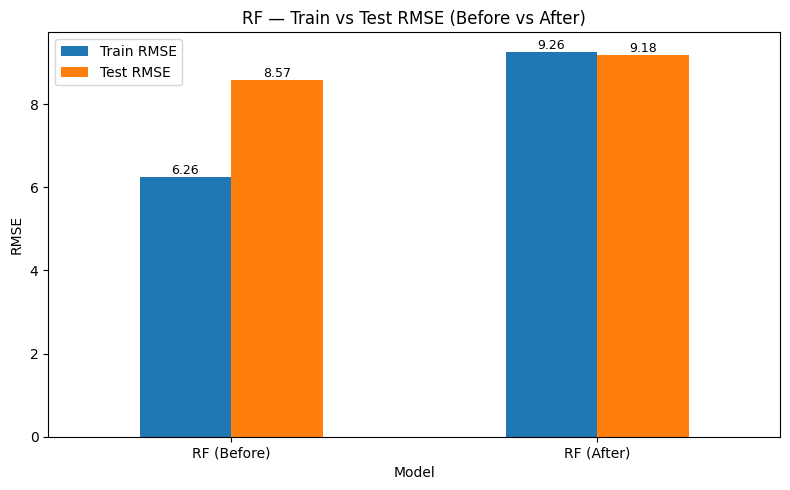

In [54]:
perform_eval = pd.DataFrame({
    "Model": ["RF (Before)", "RF (After)"],
    "Train RMSE": [6.257248, 9.261152],
    "Test RMSE":  [8.570226, 9.180400], 
})

ax = (perform_eval.set_index("Model")[["Train RMSE","Test RMSE"]]
      .plot(kind="bar", figsize=(8,5), rot=0))
plt.title("RF — Train vs Test RMSE (Before vs After)")
plt.ylabel("RMSE")

for p in ax.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width()/2
    txt = f"{h:,.0f}" if h >= 1000 else f"{h:.2f}"
    ax.annotate(txt, (x, h), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

---
Visualisasi di atas memperlihatkan perbandingan nilai RMSE (Root Mean Squared Error) antara model Random Forest (RF) sebelum dan sesudah dilakukan hyperparameter tuning. Sebelum tuning, nilai RMSE pada data latih sebesar 6.26, sedangkan pada data uji sebesar 9.26, dengan selisih cukup besar yang mengindikasikan adanya overfitting ringan — model terlalu baik dalam mempelajari data latih namun menurun akurasinya pada data baru.

Setelah dilakukan tuning, nilai RMSE pada data latih meningkat menjadi 8.57, sementara nilai pada data uji menurun menjadi 9.18. Hal ini menunjukkan bahwa model hasil tuning menjadi lebih seimbang antara performa pada data latih dan data uji. Gap yang lebih kecil juga menandakan kemampuan generalisasi model meningkat, sehingga model tidak lagi terlalu bergantung pada pola di data latih.

Secara keseluruhan, hasil tuning membuat model lebih stabil dan andal saat menghadapi data baru. Kelebihan model setelah tuning adalah peningkatan kemampuan generalisasi dan pengurangan risiko overfitting.

---

# Model Saving

In [57]:
# Simpan model terbaik ke file
with open("model_akhir.pkl", "wb") as file:
    pickle.dump(model_rf, file)